<a href="https://colab.research.google.com/github/JakeOh/202505_BD50/blob/main/lab_da/da10_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataFrame 합치기

*   merge: 두 개 이상의 데이터프레임을 공통된 컬럼(들)을 기준으로 합치는 것. SQL의 join과 비슷.
*   concat: 두 개 이상의 데이터프레임을 축(axis)을 따라서 합치는 것.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# merge

In [2]:
emp = pd.DataFrame(data={
    'empno': [100, 101, 200, 201],
    'ename': ['Scott', 'Tiger', 'King', '오쌤'],
    'deptno': [10, 20, 10, 50]
})
emp

,empno,ename,deptno
0,100,Scott,10
1,101,Tiger,20
2,200,King,10
3,201,오쌤,50


In [3]:
dept = pd.DataFrame(data={
    'deptno': [10, 20, 30],
    'dname': ['HR', 'IT', 'Sales']
})
dept

,deptno,dname
0,10,HR
1,20,IT
2,30,Sales


*   `pd.merge(left, right, how, on, ...)` 함수
*   `pd.DataFrame.merge(right, how, on, ...)` 메서드
*   파라미터 how: merge 방식(inner, left, right, outer). 기본값은 'inner'.
*   파라미터 on: join의 기준이 되는 컬럼(들의 리스트). join 컬럼 이름이 같은 경우에는 생략 가능.

## inner join

In [4]:
pd.merge(emp, dept)

,empno,ename,deptno,dname
0,100,Scott,10,HR
1,101,Tiger,20,IT
2,200,King,10,HR


In [5]:
emp.merge(dept)

,empno,ename,deptno,dname
0,100,Scott,10,HR
1,101,Tiger,20,IT
2,200,King,10,HR


## left (outer) join

In [6]:
pd.merge(emp, dept, how='left')

,empno,ename,deptno,dname
0,100,Scott,10,HR
1,101,Tiger,20,IT
2,200,King,10,HR
3,201,오쌤,50,NaN


In [7]:
emp.merge(dept, how='left')

,empno,ename,deptno,dname
0,100,Scott,10,HR
1,101,Tiger,20,IT
2,200,King,10,HR
3,201,오쌤,50,NaN


## right (outer) join

In [8]:
pd.merge(emp, dept, how='right')

,empno,ename,deptno,dname
0,100.0,Scott,10,HR
1,200.0,King,10,HR
2,101.0,Tiger,20,IT
3,NaN,NaN,30,Sales


In [9]:
emp.merge(dept, how='right')

,empno,ename,deptno,dname
0,100.0,Scott,10,HR
1,200.0,King,10,HR
2,101.0,Tiger,20,IT
3,NaN,NaN,30,Sales


## full (outer) join

In [10]:
emp.merge(dept, how='outer')

,empno,ename,deptno,dname
0,100.0,Scott,10,HR
1,200.0,King,10,HR
2,101.0,Tiger,20,IT
3,NaN,NaN,30,Sales
4,201.0,오쌤,50,NaN


## join 기준 컬럼 이름이 다른 경우

In [11]:
emp

,empno,ename,deptno
0,100,Scott,10
1,101,Tiger,20
2,200,King,10
3,201,오쌤,50


In [12]:
dept2 = pd.DataFrame(data={
    'dno': [10, 20, 30],
    'dname': ['인사', '아이티', '영업']
})
dept2

,dno,dname
0,10,인사
1,20,아이티
2,30,영업


In [13]:
# inner join
pd.merge(emp, dept2, left_on='deptno', right_on='dno')

,empno,ename,deptno,dno,dname
0,100,Scott,10,10,인사
1,101,Tiger,20,20,아이티
2,200,King,10,10,인사


In [14]:
# left (outer) join
pd.merge(emp, dept2, how='left', left_on='deptno', right_on='dno')

,empno,ename,deptno,dno,dname
0,100,Scott,10,10.0,인사
1,101,Tiger,20,20.0,아이티
2,200,King,10,10.0,인사
3,201,오쌤,50,NaN,NaN


In [15]:
# right (outer) join
pd.merge(emp, dept2, how='right', left_on='deptno', right_on='dno')

,empno,ename,deptno,dno,dname
0,100.0,Scott,10.0,10,인사
1,200.0,King,10.0,10,인사
2,101.0,Tiger,20.0,20,아이티
3,NaN,NaN,NaN,30,영업


In [16]:
# full (outer) join
pd.merge(emp, dept2, how='outer', left_on='deptno', right_on='dno')

,empno,ename,deptno,dno,dname
0,100.0,Scott,10.0,10.0,인사
1,200.0,King,10.0,10.0,인사
2,101.0,Tiger,20.0,20.0,아이티
3,NaN,NaN,NaN,30.0,영업
4,201.0,오쌤,50.0,NaN,NaN


## 인덱스(row label)로 merge

In [17]:
np.random.seed(1)

In [18]:
df1 = pd.DataFrame(data={'value1': np.random.randint(10, size=6),
                         'value2': np.random.randint(100, size=6)},
                   index=['a', 'b', 'c'] * 2)
df1

,value1,value2
a,5,1
b,8,76
c,9,71
a,5,6
b,0,25
c,0,50


In [19]:
df2 = pd.DataFrame(data={'data1': np.random.rand(3),
                         'data2': np.random.randn(3)},
                   index=['a', 'b', 'c'])
df2

,data1,data2
a,0.846311,-1.507808
b,0.313274,-0.315292
c,0.524548,0.858179


In [20]:
pd.merge(df1, df2, left_index=True, right_index=True)

,value1,value2,data1,data2
a,5,1,0.846311,-1.507808
b,8,76,0.313274,-0.315292
c,9,71,0.524548,0.858179
a,5,6,0.846311,-1.507808
b,0,25,0.313274,-0.315292
c,0,50,0.524548,0.858179


In [21]:
df1 = pd.DataFrame(data={
    'value1': np.random.randint(100, size=6),
    'value2': ['a', 'b', 'c'] * 2
})
df1

,value1,value2
0,87,a
1,94,b
2,96,c
3,86,a
4,13,b
5,9,c


In [22]:
df2 = pd.DataFrame(data={'value3': np.arange(10, 40, 10)},
                   index=['a', 'b', 'c'])
df2

,value3
a,10
b,20
c,30


In [23]:
# df1과 df2를 merge
df1.merge(df2, left_on='value2', right_index=True)

,value1,value2,value3
0,87,a,10
1,94,b,20
2,96,c,30
3,86,a,10
4,13,b,20
5,9,c,30


# concat

## Series에서의 concat

In [24]:
s1 = pd.Series(data=['scott', 'allen', 'king'])
s1

,0
0,scott
1,allen
2,king


In [25]:
s2 = pd.Series(data=['오쌤', '홍길동'])
s2

,0
0,오쌤
1,홍길동


In [26]:
pd.concat([s1, s2])

,0
0,scott
1,allen
2,king
0,오쌤
1,홍길동


In [27]:
pd.concat([s1, s2], ignore_index=True)

,0
0,scott
1,allen
2,king
3,오쌤
4,홍길동


In [28]:
s3 = pd.Series(data=['HR', 'IT'])
s3

,0
0,HR
1,IT


In [29]:
pd.concat([s1, s3], axis=1)

,0,1
0,scott,HR
1,allen,IT
2,king,NaN


## DataFrame에서의 concat

In [30]:
np.random.seed(1)
day1_df = pd.DataFrame(data=np.random.randint(100, size=(5, 3)),
                       columns=['A', 'B', 'C'])
day1_df

,A,B,C
0,37,12,72
1,9,75,5
2,79,64,16
3,1,76,71
4,6,25,50


In [31]:
day2_df = pd.DataFrame(data=np.random.randint(100, size=(5, 3)),
                       columns=['A', 'B', 'C'])
day2_df

,A,B,C
0,20,18,84
1,11,28,29
2,14,50,68
3,87,87,94
4,96,86,13


In [32]:
pd.concat([day1_df, day2_df], ignore_index=True)  # axis=0 기본값이기 때문에 생략.

,A,B,C
0,37,12,72
1,9,75,5
2,79,64,16
3,1,76,71
4,6,25,50
5,20,18,84
6,11,28,29
7,14,50,68
8,87,87,94
9,96,86,13


In [33]:
df = pd.DataFrame(data=np.random.rand(5, 3),
                  columns=['d', 'e', 'f'])
df

,d,e,f
0,0.715971,0.802758,0.092801
1,0.518153,0.865020,0.829147
2,0.829603,0.273050,0.059243
3,0.670528,0.593066,0.671654
4,0.411788,0.197551,0.289630


In [34]:
pd.concat([day1_df, df], axis=1)

,A,B,C,d,e,f
0,37,12,72,0.715971,0.802758,0.092801
1,9,75,5,0.518153,0.865020,0.829147
2,79,64,16,0.829603,0.273050,0.059243
3,1,76,71,0.670528,0.593066,0.671654
4,6,25,50,0.411788,0.197551,0.289630


# merge, concat 연습 1. 미세먼지 농도 데이터셋

*   https://github.com/pandas-dev/pandas/tree/main/doc/data 데이터 사용
*   air_quality_no2_long.csv, air_quality_pm25_long.csv, air_quality_stations.csv 파일을 읽고, 각각 데이터프레임을 생성.
*   air_quality_no2와 air_quality_pm25 데이터프레임을 합치세요.
*   위에서 만들어진 데이터프레임과 air_quality_stations 데이터프레임을 합치세요.

In [35]:
# 파일 경로
no2_file = 'https://github.com/pandas-dev/pandas/raw/refs/heads/main/doc/data/air_quality_no2_long.csv'
pm25_file = 'https://github.com/pandas-dev/pandas/raw/refs/heads/main/doc/data/air_quality_pm25_long.csv'
stations_file = 'https://github.com/pandas-dev/pandas/raw/refs/heads/main/doc/data/air_quality_stations.csv'

## air_quality_no2 데이터프레임

In [36]:
no2_df = pd.read_csv(no2_file)

In [37]:
no2_df.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [38]:
no2_df.tail()

,city,country,date.utc,location,parameter,value,unit
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³
2067,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³


In [39]:
no2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


In [40]:
no2_df.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [41]:
no2_df.country.unique()

array(['FR', 'BE', 'GB'], dtype=object)

In [42]:
no2_df.location.unique()

array(['FR04014', 'BETR801', 'London Westminster'], dtype=object)

In [43]:
no2_df.parameter.unique()

array(['no2'], dtype=object)

In [44]:
no2_df.value.describe()

,value
count,2068.000000
mean,26.261847
std,13.479451
min,0.000000
25%,17.000000
50%,25.000000
75%,33.000000
max,97.000000


## air_quality_pm25 데이터프레임

In [45]:
pm25_df = pd.read_csv(pm25_file)

In [46]:
pm25_df.head()

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³


In [47]:
pm25_df.tail()

,city,country,date.utc,location,parameter,value,unit
1105,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³
1106,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1107,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1108,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1109,London,GB,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0,µg/m³


In [48]:
pm25_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       1110 non-null   object 
 1   country    1110 non-null   object 
 2   date.utc   1110 non-null   object 
 3   location   1110 non-null   object 
 4   parameter  1110 non-null   object 
 5   value      1110 non-null   float64
 6   unit       1110 non-null   object 
dtypes: float64(1), object(6)
memory usage: 60.8+ KB


In [49]:
pm25_df.city.unique()

array(['Antwerpen', 'London'], dtype=object)

In [50]:
pm25_df.location.unique()

array(['BETR801', 'London Westminster'], dtype=object)

## air_quality_stations 데이터프레임

In [51]:
stations_df = pd.read_csv(stations_file)

In [52]:
stations_df.head()

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226


In [53]:
stations_df.tail()

,location,coordinates.latitude,coordinates.longitude
61,Southend-on-Sea,51.54420,0.67841
62,Southwark A2 Old Kent Road,51.48050,-0.05955
63,Thurrock,51.47707,0.31797
64,Tower Hamlets Roadside,51.52253,-0.04216
65,Groton Fort Griswold,41.35360,-72.07890


In [54]:
stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   location               66 non-null     object 
 1   coordinates.latitude   66 non-null     float64
 2   coordinates.longitude  66 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.7+ KB


In [55]:
stations_df[stations_df.location.isin(['FR04014', 'BETR801', 'London Westminster'])]

,location,coordinates.latitude,coordinates.longitude
9,BETR801,51.20966,4.43182
26,FR04014,48.83724,2.39390
27,FR04014,48.83722,2.39390
60,London Westminster,51.49467,-0.13193


In [56]:
stations_df_new = stations_df.drop(labels=27)  # 행 인덱스 27번을 삭제

In [57]:
stations_df_new[stations_df_new.location.isin(['FR04014', 'BETR801', 'London Westminster'])]

,location,coordinates.latitude,coordinates.longitude
9,BETR801,51.20966,4.43182
26,FR04014,48.83724,2.39390
60,London Westminster,51.49467,-0.13193


## no2와 pm25 데이터프레임 concat

In [58]:
air_quality = pd.concat([no2_df, pm25_df], ignore_index=True)

In [59]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [60]:
air_quality.tail()

,city,country,date.utc,location,parameter,value,unit
3173,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³
3174,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³
3175,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³
3176,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³
3177,London,GB,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0,µg/m³


In [61]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       3178 non-null   object 
 1   country    3178 non-null   object 
 2   date.utc   3178 non-null   object 
 3   location   3178 non-null   object 
 4   parameter  3178 non-null   object 
 5   value      3178 non-null   float64
 6   unit       3178 non-null   object 
dtypes: float64(1), object(6)
memory usage: 173.9+ KB


In [62]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [63]:
air_quality.country.unique()

array(['FR', 'BE', 'GB'], dtype=object)

In [64]:
air_quality.location.unique()

array(['FR04014', 'BETR801', 'London Westminster'], dtype=object)

## air_quality, locations_df_new 데이터프레임 merge

In [65]:
air_quality = pd.merge(air_quality, stations_df_new)

In [66]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,48.83724,2.3939
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,48.83724,2.3939
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,48.83724,2.3939
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,48.83724,2.3939
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,48.83724,2.3939


In [67]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   3178 non-null   object 
 1   country                3178 non-null   object 
 2   date.utc               3178 non-null   object 
 3   location               3178 non-null   object 
 4   parameter              3178 non-null   object 
 5   value                  3178 non-null   float64
 6   unit                   3178 non-null   object 
 7   coordinates.latitude   3178 non-null   float64
 8   coordinates.longitude  3178 non-null   float64
dtypes: float64(3), object(6)
memory usage: 223.6+ KB


In [68]:
air_quality['date.utc'] = pd.to_datetime(air_quality['date.utc'], utc=True)

In [69]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   city                   3178 non-null   object             
 1   country                3178 non-null   object             
 2   date.utc               3178 non-null   datetime64[ns, UTC]
 3   location               3178 non-null   object             
 4   parameter              3178 non-null   object             
 5   value                  3178 non-null   float64            
 6   unit                   3178 non-null   object             
 7   coordinates.latitude   3178 non-null   float64            
 8   coordinates.longitude  3178 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), object(5)
memory usage: 223.6+ KB


In [70]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,48.83724,2.3939
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,48.83724,2.3939
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,48.83724,2.3939
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,48.83724,2.3939
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,48.83724,2.3939


## London의 NO2, PM25 농도 시계열 그래프

In [71]:
london_df = air_quality[air_quality.city == 'London']

In [72]:
london_df.head()

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
1099,London,GB,2019-06-17 11:00:00+00:00,London Westminster,no2,11.0,µg/m³,51.49467,-0.13193
1100,London,GB,2019-06-17 10:00:00+00:00,London Westminster,no2,11.0,µg/m³,51.49467,-0.13193
1101,London,GB,2019-06-17 09:00:00+00:00,London Westminster,no2,11.0,µg/m³,51.49467,-0.13193
1102,London,GB,2019-06-17 08:00:00+00:00,London Westminster,no2,13.0,µg/m³,51.49467,-0.13193
1103,London,GB,2019-06-17 07:00:00+00:00,London Westminster,no2,13.0,µg/m³,51.49467,-0.13193


In [73]:
london_df.tail()

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
3173,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³,51.49467,-0.13193
3174,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
3175,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
3176,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
3177,London,GB,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193


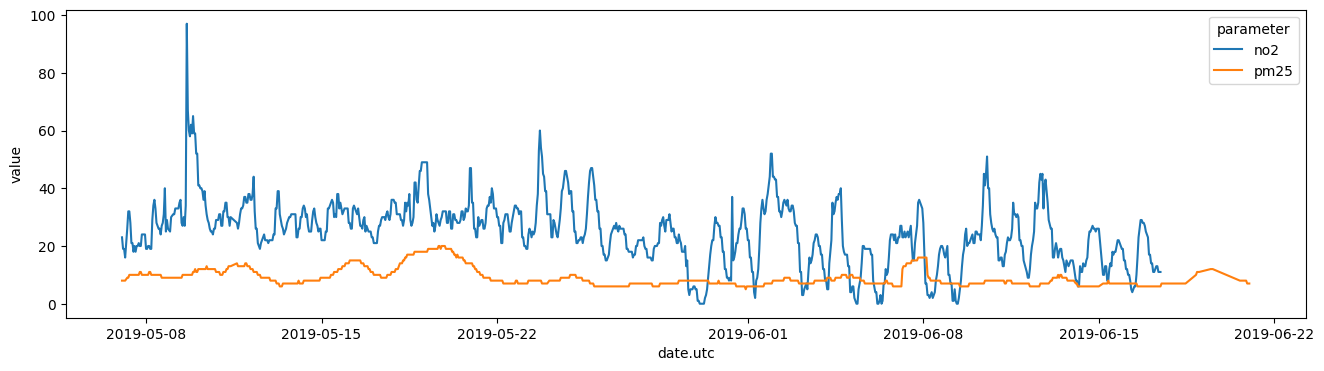

In [74]:
fig = plt.figure(figsize=(16, 4))
sns.lineplot(data=london_df, x='date.utc', y='value', hue='parameter')
plt.show()

# merge, concat 연습 2. 신생아 이름 데이터셋

*   https://github.com/wesm/pydata-book/tree/3rd-edition/datasets/babynames 데이터 파일들을 사용
*   1880년부터 2010년까지 미국 신생아들의 이름, 성별, 출생자수가 정리된 파일
*   파일을 하나씩 읽어서 데이터 프레임 생성하세요.
*   생성된 데이터 프레임에 year 컬럼을 추가하세요.
*   생성된 131개의 데이터 프레임을 하나로 합치세요.
*   연도별 신생아 수를 찾고 그래프를 그리세요.
*   연도별 성별 신생아 수를 찾고 그래프를 그리세요.

In [80]:
file_path = 'https://github.com/wesm/pydata-book/raw/refs/heads/3rd-edition/datasets/babynames/yob2010.txt'
yob_2010 = pd.read_csv(file_path, names=['name', 'gender', 'births'])
yob_2010['year'] = 2010
yob_2010.head()

,name,gender,births,year
0,Isabella,F,22731,2010
1,Sophia,F,20477,2010
2,Emma,F,17179,2010
3,Olivia,F,16860,2010
4,Ava,F,15300,2010


In [81]:
col_names = ['name', 'gender', 'births']  # 데이터프레임 컬럼 이름

yobs = []  # 각 연도의 데이터프레임을 저장할 빈 리스트
for year in range(1880, 2011):
    # txt 파일이 저장된 github 경로
    file_path = f'https://github.com/wesm/pydata-book/raw/refs/heads/3rd-edition/datasets/babynames/yob{year}.txt'
    # 파일을 읽어서 데이터프레임을 생성
    yob_year = pd.read_csv(file_path, names=col_names)
    # 데이터프레임에 year 파생변수를 추가
    yob_year['year'] = year
    # 생성된 데이터프레임을 리스트에 추가
    yobs.append(yob_year)

In [82]:
len(yobs)  # 리스트의 원소 개수 -> 데이터프레임 개수

131

In [83]:
yobs[0]  # 리스트의 첫번째 원소 -> 1880년 데이터프레임

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1995,Woodie,M,5,1880
1996,Worthy,M,5,1880
1997,Wright,M,5,1880
1998,York,M,5,1880


In [84]:
yobs[-1]  # 리스트의 마지막 원소 -> 2010년 데이터프레임

,name,gender,births,year
0,Isabella,F,22731,2010
1,Sophia,F,20477,2010
2,Emma,F,17179,2010
3,Olivia,F,16860,2010
4,Ava,F,15300,2010
...,...,...,...,...
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010


In [85]:
yob_df = pd.concat(yobs, ignore_index=True)

In [86]:
yob_df.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [87]:
yob_df.tail()

,name,gender,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [88]:
yob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   gender  1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


## 연도별 신생아 수

In [90]:
yob_by_year = yob_df.groupby(by=['year']).births.sum()

In [91]:
yob_by_year.head()

,births
year,
1880,201486
1881,192703
1882,221538
1883,216954
1884,243466


In [92]:
yob_by_year.tail()

,births
year,
2006,3946702
2007,3986130
2008,3915955
2009,3801002
2010,3657392


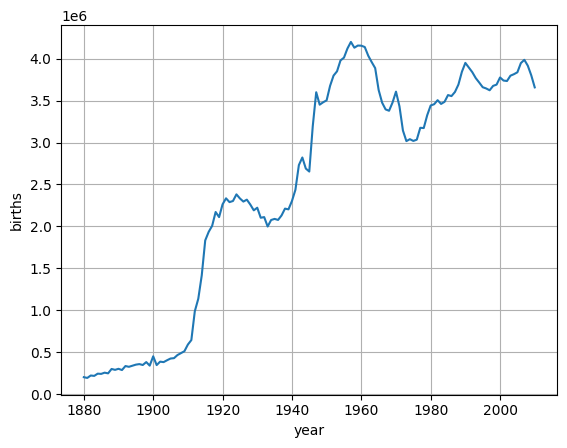

In [93]:
sns.lineplot(data=yob_by_year)
plt.grid()
plt.show()